<a href="https://colab.research.google.com/github/guilhermelaviola/InterMilan/blob/main/AllPlayers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Importing all the necessary libraries:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from google.colab import drive
sns.set(style = 'darkgrid')
plt.style.use('seaborn-pastel')
drive.mount('/content/drive')

<ipython-input-2-921de9e8a408>:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')


Mounted at /content/drive


In [4]:
# Setting the search parameters:
filename = 'inter-milan.xlsx'
search_path = '/content/drive/My Drive/Datasets/Soccer'
# Search for the file
file = None
for root, dirs, files in os.walk(search_path):
    if filename in files:
        file= os.path.join(root, filename)
        break
    df = pd.read_excel(file)

In [5]:
# Importing and displaying the last 10 goals scored:
df = pd.ExcelFile(file)
players = pd.read_excel(df, 'All Players')
players.tail(10)

,Number,Continent,Nationality,Position,Player,Year joined,Club President,Manager
1172,9,Europe,France,Attacker,Marcus Thuram,2023,Steven Zhang,Simone Inzaghi
1173,14,Europe,Netherlands,Midfielder,Davy Klaassen,2023,Steven Zhang,Simone Inzaghi
1174,7,South America,Colombia,Midfielder,Juan Cuadrado,2023,Steven Zhang,Simone Inzaghi
1175,17,North America,Canada,Midfielder,Tajon Buchanan,2023,Steven Zhang,Simone Inzaghi
1176,31,Europe,Germany,Defender,Yann Aurel Bisseck,2023,Steven Zhang,Simone Inzaghi
1177,1,Europe,Switzerland,Goalkeeper,Yann Sommer,2023,Steven Zhang,Simone Inzaghi
1178,7,Europe,Poland,Midfielder,Piotr Zielinski,2024,Giuseppe Marotta,Simone Inzaghi
1179,99,Asia,Iran,Striker,Mehdi Taremi,2024,Giuseppe Marotta,Simone Inzaghi
1180,13,Europe,Spain,Goalkeeper,Josep Martímez,2024,Giuseppe Marotta,Simone Inzaghi
1181,42,South America,Argentina,Defender,Tomás Palacios,2024,Giuseppe Marotta,Simone Inzaghi


In [6]:
# Displaying the number of rows and columns in the dataset:
players.shape

(1182, 8)

# **Plotting basic column data**

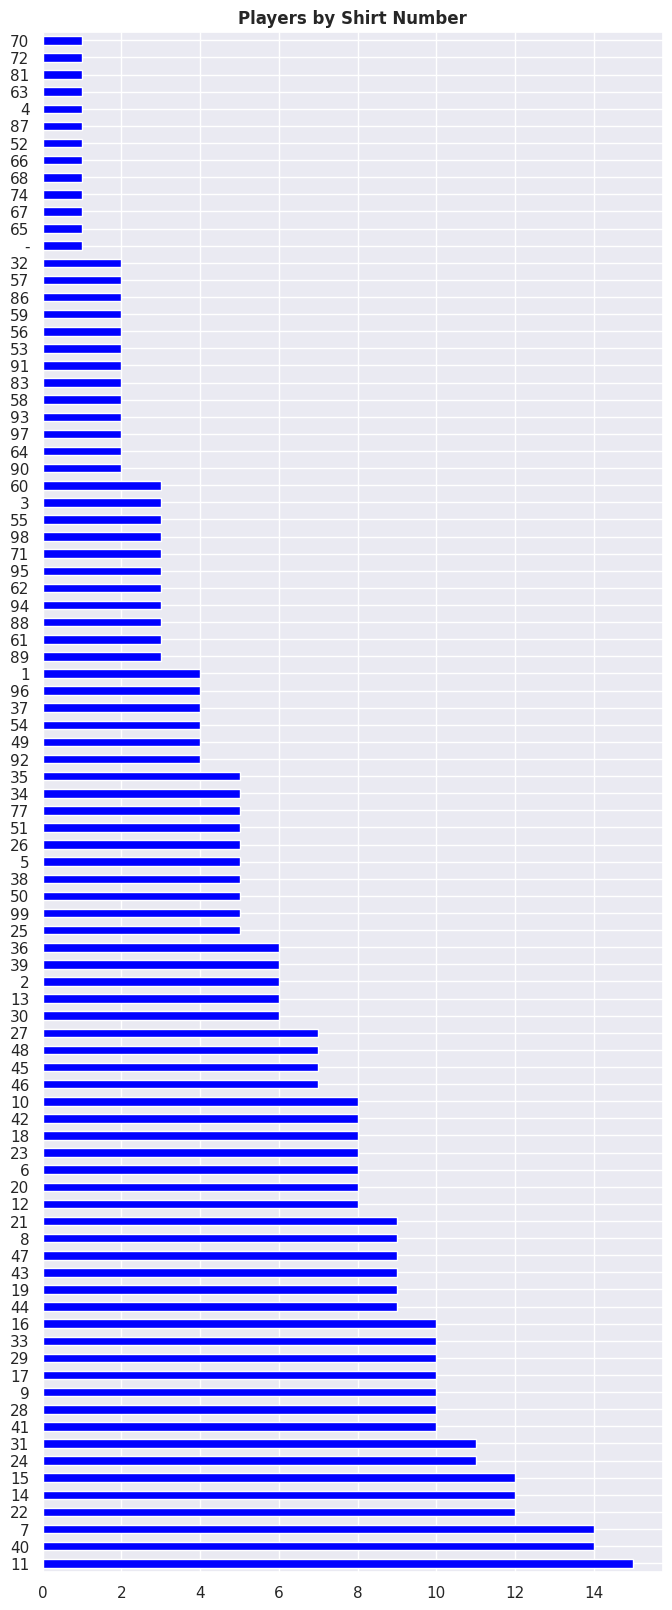

In [7]:
# Displaying players by shirt number:
players['Number'].value_counts().plot(kind = 'barh', color = 'blue', figsize = (8, 20))
plt.ylabel(None)
plt.title('Players by Shirt Number', fontweight = 'bold')
plt.show()

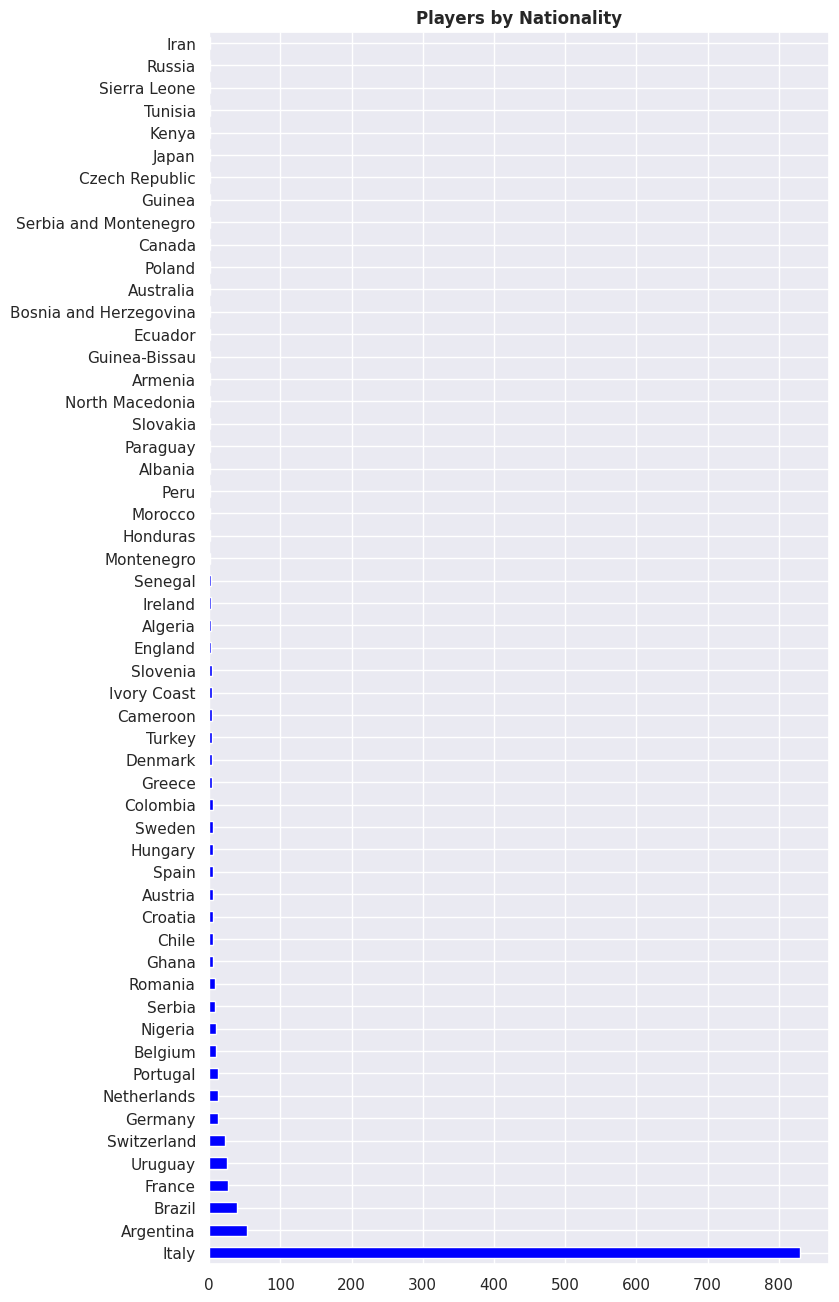

In [8]:
# Displaying players by nationality:
players['Nationality'].value_counts().plot(kind = 'barh', color = 'blue', figsize = (8, 16))
plt.ylabel(None)
plt.title('Players by Nationality', fontweight = 'bold')
plt.show()

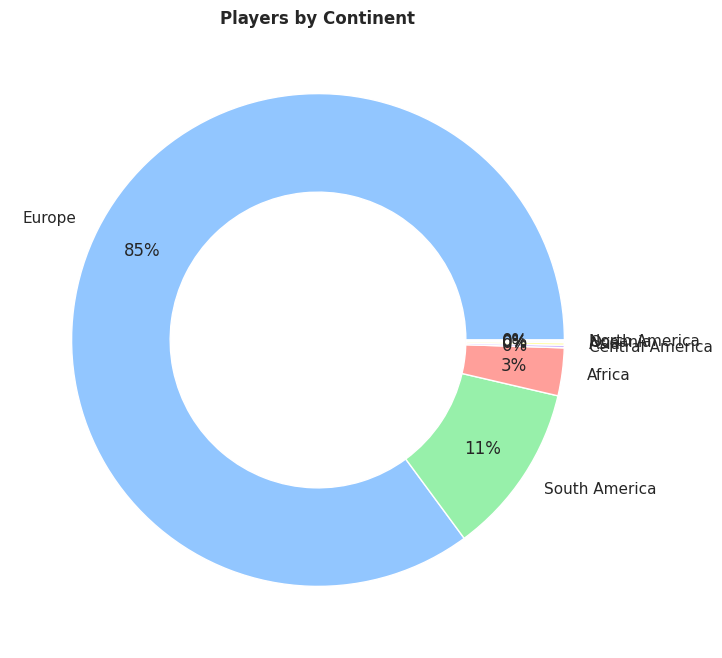

In [9]:
# Displaying players by continent:
players['Continent'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Players by Continent', fontweight = 'bold')
plt.show()

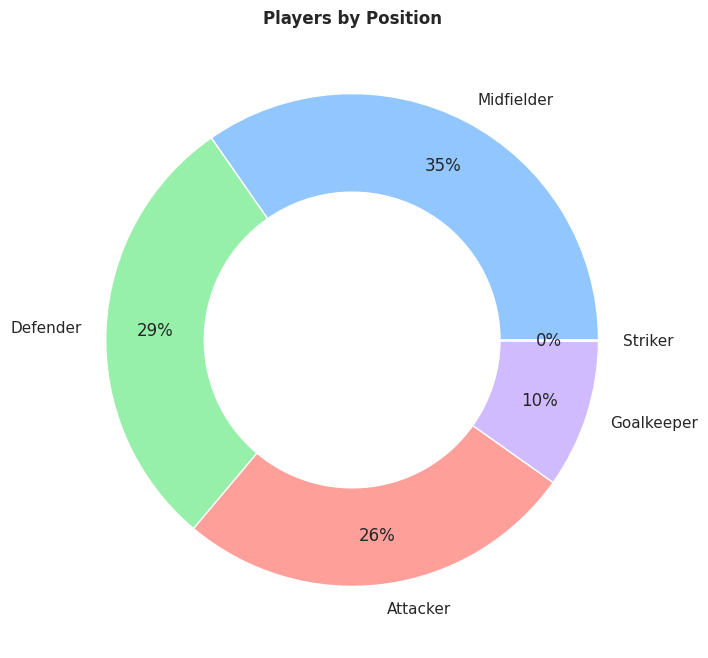

In [10]:
# Displaying players by position:
players['Position'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Players by Position', fontweight = 'bold')
plt.show()

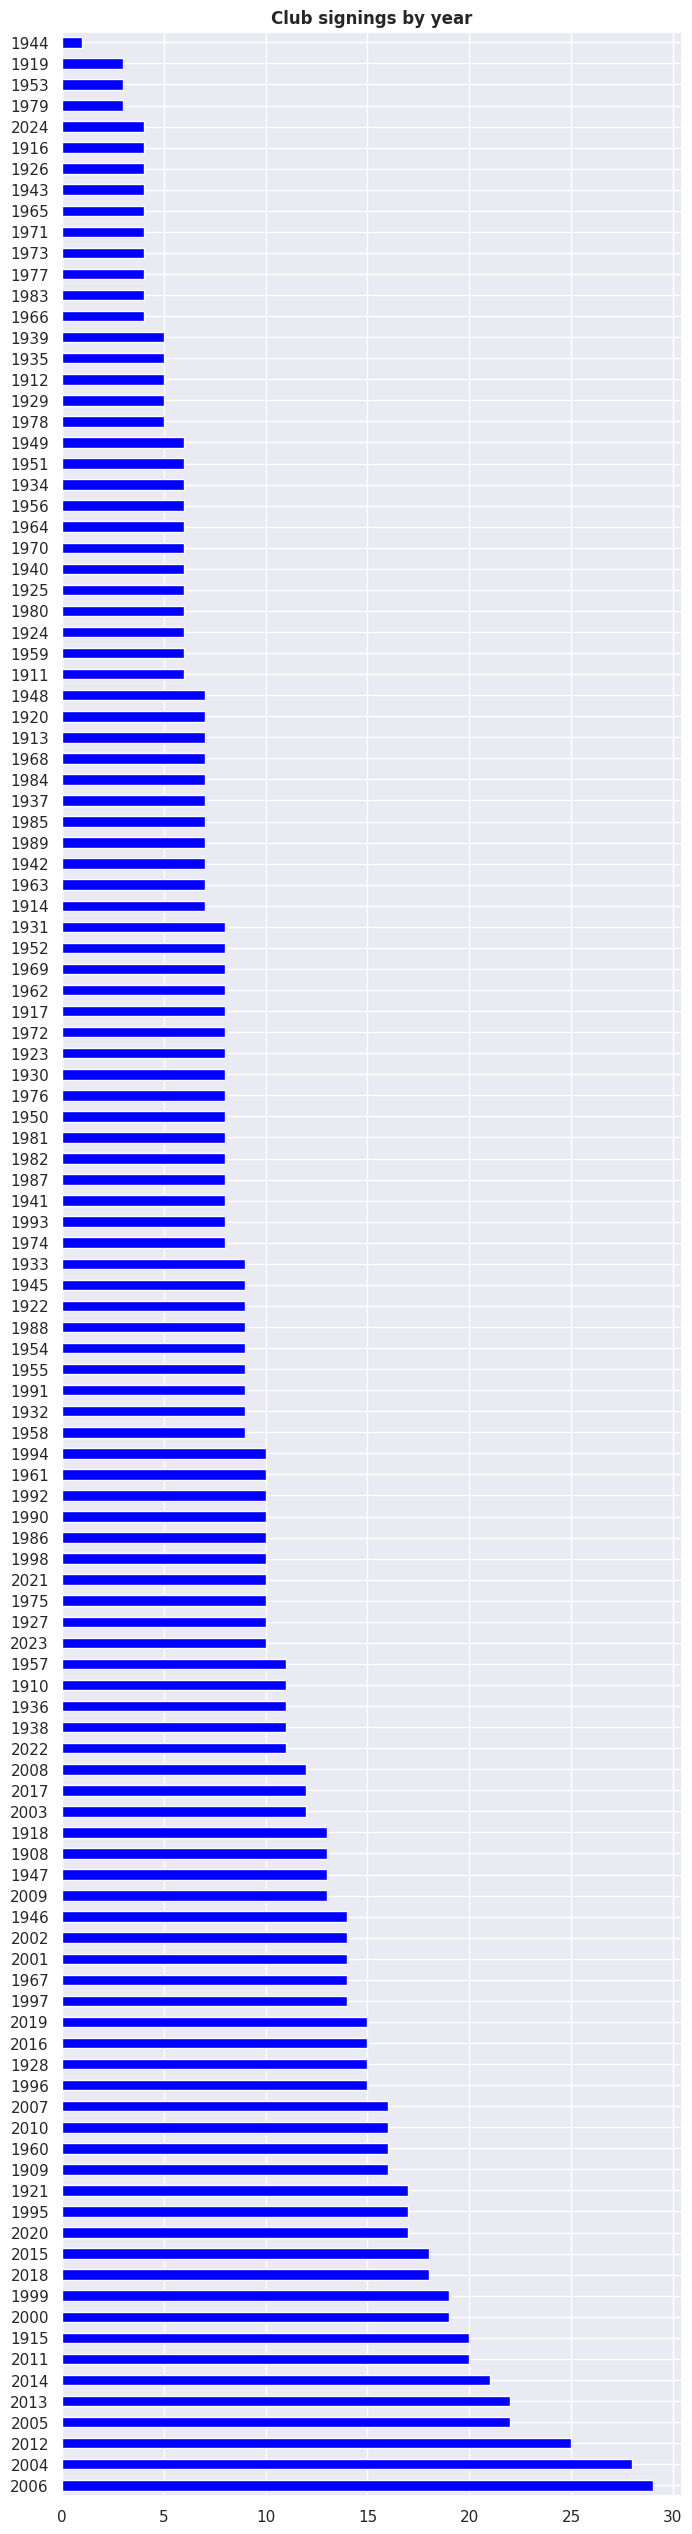

In [11]:
# Displaying players by the year they joined the club:
players['Year joined'].value_counts().plot(kind = 'barh', color = 'blue', figsize = (8, 32))
plt.ylabel(None)
plt.title('Club signings by year', fontweight = 'bold')
plt.show()

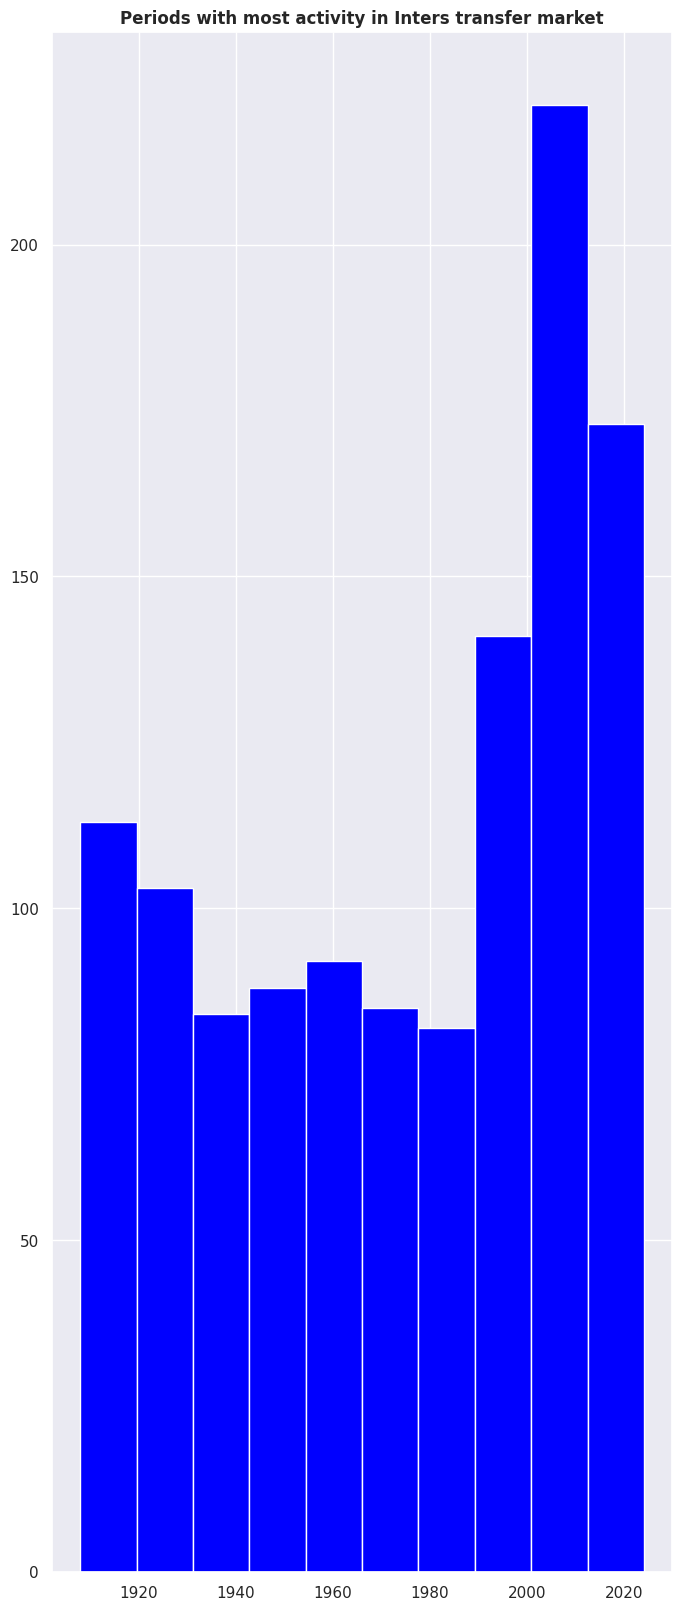

In [12]:
# Displaying players by shirt number:
players['Year joined'].plot(kind = 'hist', color = 'blue', figsize = (8, 20))
plt.ylabel(None)
plt.title('Periods with most activity in Inters transfer market', fontweight = 'bold')
plt.show()

# **Plotting Inter presidents and managers who most signed players**

In [13]:
# Converting the Club president column data into string:
players['Club President'] = players['Club President'].astype(str)

# Splitting the managers names by comma and removing leading spaces:
players['Club President'] = players['Club President'].str.split(',').apply(lambda x : [i.strip() for i in x])

# Exploding the list into separate rows:
players = players.explode('Club President')

# Counting Matrix using crosstab method:
president_counts = pd.crosstab(index = players.index, columns = players['Club President'], margins = False).to_dict('index')
president_counts = pd.DataFrame(president_counts)

# Counting the number of 0s and 1s in each row:
president_counts_final = (president_counts.apply(lambda row : [sum(row == 0), sum(row == 1)], axis = 1))

In [14]:
# Defining and displaying the final count with 2 columns ('False' and 'True'):
president_counts_final = pd.DataFrame(president_counts_final.tolist(), index = president_counts_final.index, columns = ['False', 'True'])
print(president_counts_final)

                              False  True
Angelo Moratti                 1065   117
Carlo De Medici                1160    22
Carlo Masseroni                1078   104
Emilio Hirzel                  1170    12
Enrico Olivetti                1158    24
Erick Thohir                   1076   106
Ernesto Pellegrini             1070   112
Ernesto Torrusio               1162    20
Ettore Strauss                 1155    27
Ferdinando Pozzani             1090    92
Francesco Mauro                1141    41
Giacinto Facchetti             1103    79
Giorgio Hulss                  1172    10
Giovanni Paramithiotti         1153    29
Giuseppe Marotta               1178     4
Giuseppe Visconti Di Modrone   1127    55
Ivanoe Fraizzoli               1074   108
Luigi Ansbacher                1168    14
Massimo Moratti                 867   315
Oreste Simonotti               1161    21
Senatore Borletti              1153    29
Steven Zhang                   1101    81


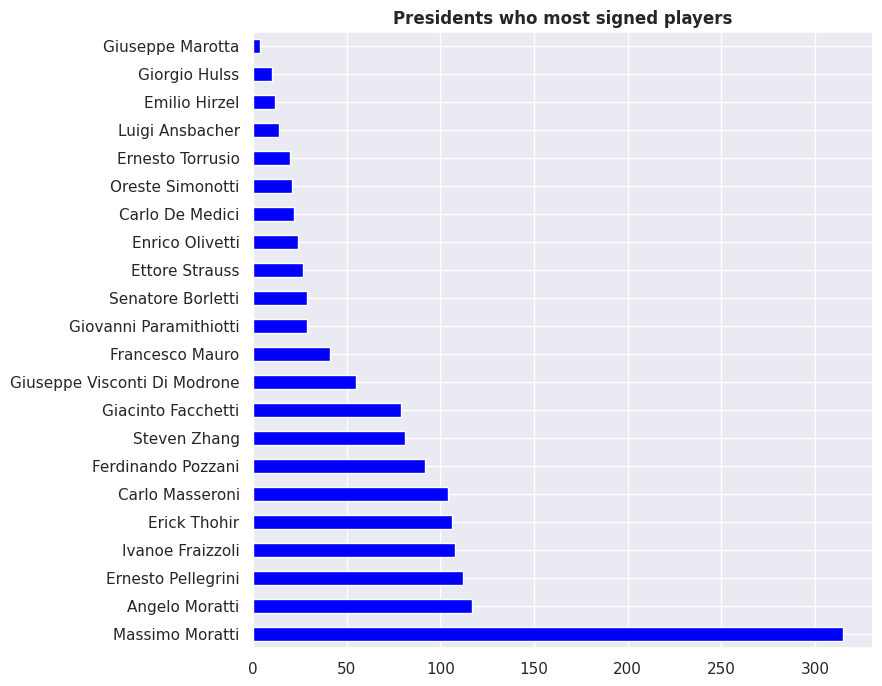

In [15]:
# Displaying Inter presidents who most signed players:
president_counts_final['True'].sort_values(ascending = False).plot(kind = 'barh', color = 'blue', figsize = (8, 8))
plt.ylabel(None)
plt.title('Presidents who most signed players', fontweight = 'bold')
plt.show()

In [16]:
# Converting the Manager column data into string:
players['Manager'] = players['Manager'].astype(str)

# Splitting the managers names by comma and removing leading spaces:
players['Manager'] = players['Manager'].str.split(',').apply(lambda x : [i.strip() for i in x])

# Exploding the list into separate rows:
players = players.explode('Manager')

# Counting Matrix using crosstab method:
manager_counts = pd.crosstab(index = players.index, columns = players['Manager'], margins = False).to_dict('index')
manager_counts = pd.DataFrame(manager_counts)

# Counting the number of 0s and 1s in each row:
manager_counts_final = (manager_counts.apply(lambda row : [sum(row == 0), sum(row == 1)], axis = 1))

In [18]:
# Defining and displaying the final count with 2 columns ('False' and 'True'):
manager_counts_final = pd.DataFrame(manager_counts_final.tolist(), index = manager_counts_final.index, columns = ['False', 'True'])
print(manager_counts_final)

                    False  True
Alberto Zaccheroni   1142    12
Albino Carraro       1171    11
Aldo Campatelli      1173     0
Aldo Campattelli     1160    22
Aldo Olivieri        1160    22
...                   ...   ...
Virgilio Fossatti    1097    39
Walter Mazzarri      1139    21
nan                  1139    43
Árpad Weisz          1176     6
Árpád Weisz          1114    36

[69 rows x 2 columns]


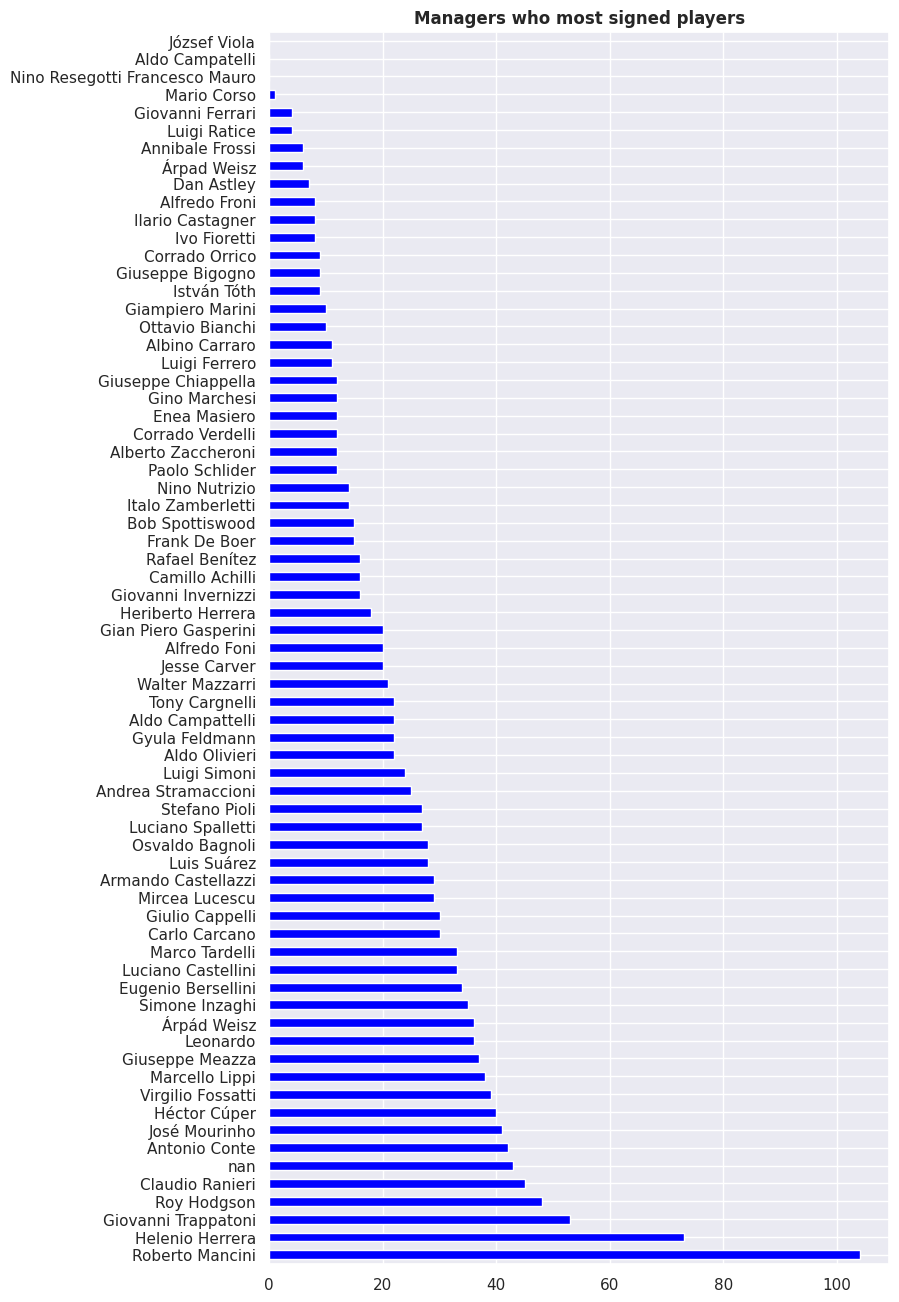

In [19]:
# Displaying Inter managers who most signed players:
manager_counts_final['True'].sort_values(ascending = False).plot(kind = 'barh', color = 'blue', figsize = (8, 16))
plt.ylabel(None)
plt.title('Managers who most signed players', fontweight = 'bold')
plt.show()